**Bellabeat Case Study**

**Summary of the Business:**

Bellabeat is a high-tech company founded in 2013 that manages and manufactures health focused smart products to inform and inspire women around the world. The data the company collects is meant to empower women and provide insight into their health habits. The founders of Bellabeat want to analyze current consumer data on smart device usage to make informed decisions on an optimal marketing strategy, to continue to grow into a larger tech-driven wellness company.

We will be looking at the Bellabeat app and how the analysis can give us insight into how to improve Bellabeat’s marketing strategy. The Bellabeat app connects to Bellabeat’s smart wellness products line, and provides users with health data that is related to activity, sleep, stress, and mindfulness habits. The data provided from this app helps users make better decisions regarding their health and current habits.

**1. ASK**

**Business Task**

Improve Bellabeat marketing strategy by identifying trends within smart data customer usage.

**Stakeholders**

Urska Srsen : Co-Founder and CCO of Bellabeat
Sando Mur: Co-Founder and key member of the Bellabeat executive team
Marketing Analytics Team: We will be in constant contact with the marketing team as our analysis will help drive their decision to improve the Bellabeat marketing strategy

**2. PREPARE**

**Data Storage/Privacy and Accessibility**

The data collected is titled Fitbit Fitness Tracker, and was stored on Kaggle. The data set was made available by Morbius. It’s an open source data set that was generated by respondents via survey through Amazon Mechanical Turk between 0.3.12.2016 - 05.12.2016. By verifying the metadata on Kaggle, we  can confirm that it’s open source, and that all rights were waived by the owner, allowing us to edit, analyze, interpret, and redistribute this data. 

**Data Integrity and Sampling Bias**

This data set is organized in a long format. We’ll be focusing on daily trends from the Fitbit data set including; daily activity, calories, intensities, sleep, weight, and heart rate. The data for activity, calories, intensities, and sleep, measure over a 31 day period for 33 users. However, data for weight consists of 8 users over a 30 day period, and 7 users for heart rate. We might encounter a sampling bias due to sample size not having any demographic information available. We’re also not sure the sample size is representative of the entire population. Because the data set was gathered in 2016, there may be inaccuracies and the data could prove to be unreliable/outdated.

**3. PROCESS**

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(tidyr)
library(janitor)
library(dplyr) # load the dplyr package
library(magrittr) # load the magrittr package

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




**Importing Data**

In [2]:
Daily.Activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Daily.Calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
Daily.Intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
Daily.SleepLog <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

To verify that everything has been imported correctly, I will use the head and str function to preview how the data is presented. I want to get an understanding of how I will want to format the data set.

In [3]:
#Use to preview our selected data frames and see how the data is presented. Check for formating.
head(Daily.Activity)
str(Daily.Activity)

head(Daily.Calories)
str(Daily.Calories)

head(Daily.Intensities)
str(Daily.Intensities)

head(Daily.SleepLog)
str(Daily.SleepLog)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


spc_tbl_ [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : num [1:940] 1985 1797 1776 1745 1863 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


spc_tbl_ [940 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : num [1:940] 728 776 1218 726 773 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   SedentaryMinutes = col_double(),
  ..   LightlyActiveMinutes = col_double(),
  ..   Fa

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
#Use to find unique users (total number of users per data set)
n_distinct(Daily.Activity$Id)
n_distinct(Daily.Calories$Id)
n_distinct(Daily.Intensities$Id)
n_distinct(Daily.SleepLog$Id)


[1] 33

[1] 33

[1] 33

[1] 24

I used to distinct function to get the number of participants for each of the chosen data sets. There were a total of 33 participants for activity,calories,and intensities. The sleep log data set had 24 participants.

In [5]:
#Find how many duplicate entries there are within the chosen datasets. SleepLog had 3 duplicates before running the code below to delete duplicates. Was confirmed to be at 0 after entering the code.
sum(duplicated(Daily.Activity))
sum(duplicated(Daily.Calories))
sum(duplicated(Daily.Intensities))
sum(duplicated(Daily.SleepLog))

[1] 0

[1] 0

[1] 0

[1] 3

I wanted to find how many duplicate entries there were in the data sets chosen, and used the sum(duplicated()) function to let me know what I would need to clean up. 

In [6]:
Daily.SleepLog <- Daily.SleepLog %>%
    distinct() %>%
    drop_na()

After identifying duplicates, I went ahead and cleaned it up. I verified the duplicates were deleted by using the same function stated above.

In [7]:
sum(duplicated(Daily.SleepLog))

[1] 0

**4. Analyze**

In [8]:
#clean and format column with the correct syntax/rename
clean_names(Daily.Activity)
Daily.Activity <- rename_with(Daily.Activity, tolower)
clean_names(Daily.Calories)
Daily.Calories <- rename_with(Daily.Calories, tolower)
clean_names(Daily.Intensities)
Daily.Intensities <- rename_with(Daily.Intensities, tolower)
clean_names(Daily.SleepLog)
Daily.SleepLog <- rename_with(Daily.SleepLog, tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,activity_day,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728
1503960366,4/18/2016,1921
1503960366,4/19/2016,2035
1503960366,4/20/2016,1786


id,activity_day,sedentary_minutes,lightly_active_minutes,fairly_active_minutes,very_active_minutes,sedentary_active_distance,light_active_distance,moderately_active_distance,very_active_distance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19
1503960366,4/18/2016,1149,233,16,42,0,4.71,0.64,3.25
1503960366,4/19/2016,775,264,31,50,0,5.03,1.32,3.53
1503960366,4/20/2016,818,205,12,28,0,4.24,0.48,1.96


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


In [9]:
# Check the column names of each data set to make referencing easier
names(Daily.Activity)
names(Daily.Calories)
names(Daily.Intensities)
names(Daily.SleepLog)

[1] "id"                       "activitydate"            
 [3] "totalsteps"               "totaldistance"           
 [5] "trackerdistance"          "loggedactivitiesdistance"
 [7] "veryactivedistance"       "moderatelyactivedistance"
 [9] "lightactivedistance"      "sedentaryactivedistance" 
[11] "veryactiveminutes"        "fairlyactiveminutes"     
[13] "lightlyactiveminutes"     "sedentaryminutes"        
[15] "calories"

[1] "id"          "activityday" "calories"

[1] "id"                       "activityday"             
 [3] "sedentaryminutes"         "lightlyactiveminutes"    
 [5] "fairlyactiveminutes"      "veryactiveminutes"       
 [7] "sedentaryactivedistance"  "lightactivedistance"     
 [9] "moderatelyactivedistance" "veryactivedistance"

[1] "id"                 "sleepday"           "totalsleeprecords" 
[4] "totalminutesasleep" "totaltimeinbed"

In [10]:
#I was getting errors using 'rename' and 'mutate' to conform columns to have a universal format. I used 'as.POSIXct' to extract data and create a new column for sleep and activity, and matched the format for intensities
#Clean date/time format to be congruent. We will be merging data sets and want everything to move smoothly

# activity
Daily.Activity$activitydate <- as.POSIXct(Daily.Activity$activitydate, format="%m/%d/%Y", tz=Sys.timezone())
Daily.Activity$date <- format(Daily.Activity$activitydate, format="%m/%d/%Y")

# sleep
Daily.SleepLog$sleepday <- as.POSIXct(Daily.SleepLog$sleepday, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
Daily.SleepLog$date <- format(Daily.SleepLog$sleepday, format="%m/%d/%Y")

# intensities
Daily.Intensities$date <- format(as.Date(Daily.Intensities$activityday, format="%m/%d/%Y"), format="%m/%d/%Y")

# calories
Daily.Calories$date <- format(as.Date(Daily.Calories$activityday, format="%m/%d/%Y"), format="%m/%d/%Y")


After formatting everything correctly, I checked my work by using the head function.

In [11]:
head(Daily.Activity)
head(Daily.Calories)
head(Daily.Intensities)
head(Daily.SleepLog)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/2016
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/2016
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/2016
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/2016
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/2016
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/2016


id,activityday,calories,date
<dbl>,<chr>,<dbl>,<chr>
1503960366,4/12/2016,1985,04/12/2016
1503960366,4/13/2016,1797,04/13/2016
1503960366,4/14/2016,1776,04/14/2016
1503960366,4/15/2016,1745,04/15/2016
1503960366,4/16/2016,1863,04/16/2016
1503960366,4/17/2016,1728,04/17/2016


id,activityday,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88,04/12/2016
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57,04/13/2016
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44,04/14/2016
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14,04/15/2016
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71,04/16/2016
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19,04/17/2016


id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,04/12/2016
1503960366,2016-04-13,2,384,407,04/13/2016
1503960366,2016-04-15,1,412,442,04/15/2016
1503960366,2016-04-16,2,340,367,04/16/2016
1503960366,2016-04-17,1,700,712,04/17/2016
1503960366,2016-04-19,1,304,320,04/19/2016


**Merging Data**

I wanted to merge 2 data sets to look at potential correlations. I had initially wanted to do 2 different mergers, but wasn't finding the correlation I was looking for due to a lack of data. I decided to merge daily activity and the daily sleep log.

Another reason I decided to stick to just one merger of data sets, was because a lot of the data I was looking at was repetitive.

In [12]:
#merge daily.actvity with daily.sleeplog to see the correlation between activity and sleep wellness. We'll use either active minutes or steps in coordination with sleep
Daily.Activity_Sleep <- merge(Daily.Activity, Daily.SleepLog, by=c ("id", "date"))
glimpse(Daily.Activity_Sleep)

Rows: 410
Columns: 20
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <chr> "04/12/2016", "04/13/2016", "04/15/2016", "04…
$ activitydate             <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminu

In [13]:
#Find the average mean of active minutes and calories. Create a column for total active minutes and find the mean. We want to look for a correlation between active minutes and calories
Daily.Average <- Daily.Activity_Sleep %>%
  group_by(id) %>%
  mutate(total_active_min = veryactiveminutes + fairlyactiveminutes + lightlyactiveminutes) %>%
   summarize(mean_very_active_min=mean(veryactiveminutes), 
            mean_fairly_active_min=mean(fairlyactiveminutes), 
            mean_lightly_active_minutes=mean(lightlyactiveminutes), 
            mean_sedentary_min=mean(sedentaryminutes),
            mean_total_active_min=mean(total_active_min),
            mean_daily_calories=mean(calories),
            mean_sleep_min=mean(totalminutesasleep))
head(Daily.Average)


id,mean_very_active_min,mean_fairly_active_min,mean_lightly_active_minutes,mean_sedentary_min,mean_total_active_min,mean_daily_calories,mean_sleep_min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,37.9200000,20.2800000,233.12,759.2800,291.3200,1872.280,360.2800
1644430081,2.5000000,19.5000000,241.25,920.5000,263.2500,2977.750,294.0000
1844505072,0.0000000,2.3333333,145.00,443.3333,147.3333,1676.333,652.0000
1927972279,0.0000000,0.0000000,85.00,977.2000,85.0000,2316.200,417.0000
2026352035,0.1071429,0.2857143,256.50,653.9643,256.8929,1540.786,506.1786
2320127002,0.0000000,0.0000000,242.00,1129.0000,242.0000,1804.000,61.0000


After finding the mean for the data I wanted to look at, I decided to create a table on the average amount of active/inactive minutes, sleep, and calories throughout the week.

In [14]:
Daily.Activity_Sleep$date <- as.Date(Daily.Activity_Sleep$date)

WeekActivity_Sleep <- Daily.Activity_Sleep %>%
    mutate(weekday = weekdays(date)) %>%
    mutate(weekday = ordered(weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                               "Friday", "Saturday", "Sunday"))) %>%
    group_by(weekday) %>%
    summarize(daily_activity = mean(veryactiveminutes+fairlyactiveminutes),
              Sedentary = mean(sedentaryminutes), daily_sleep = mean(totalminutesasleep), Calories=mean(calories))

head(WeekActivity_Sleep)

weekday,daily_activity,Sedentary,daily_sleep,Calories
<ord>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,34.00000,741.8800,427.4000,2365.520
Tuesday,26.36842,487.6316,427.2105,1870.526
Wednesday,43.00000,716.9600,417.6000,2456.920
Thursday,45.07143,721.7143,417.3571,2349.964
Friday,47.25000,748.8333,361.5833,2550.167
Saturday,36.78571,686.8571,442.8571,2336.357


**Visualization**

**5.Share**

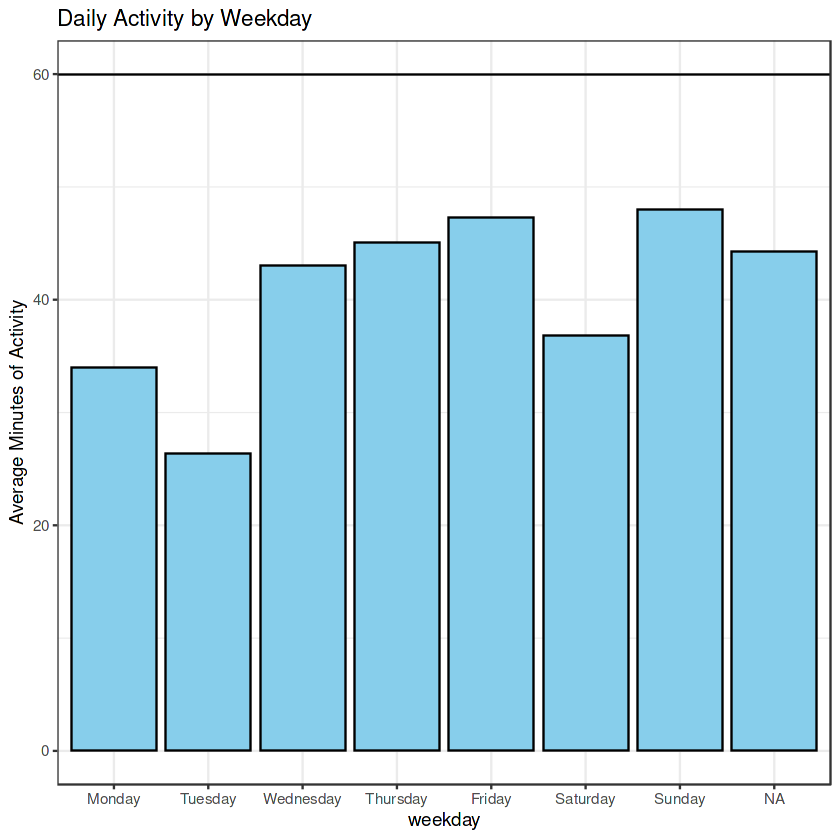

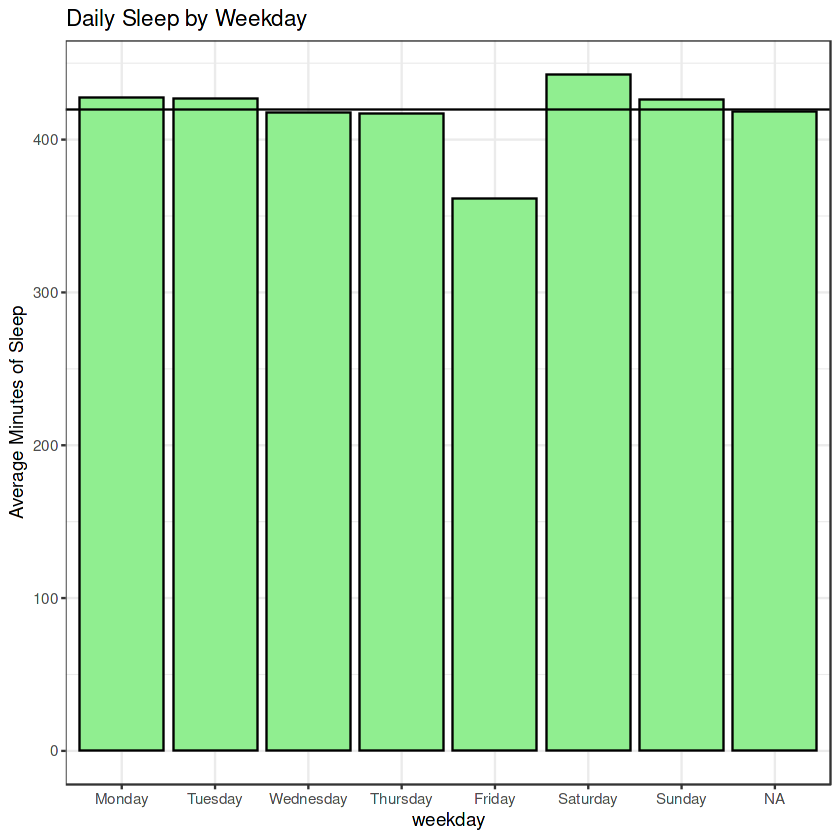

In [15]:
# plot for daily activity
ggplot(WeekActivity_Sleep, aes(x = weekday, y = daily_activity)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_hline(yintercept =60) +
  ggtitle("Daily Activity by Weekday") +
  ylab("Average Minutes of Activity") +
  theme_bw()

# plot for daily sleep
ggplot(WeekActivity_Sleep, aes(x = weekday, y = daily_sleep)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  geom_hline(yintercept =420) +
  ggtitle("Daily Sleep by Weekday") +
  ylab("Average Minutes of Sleep") +
  theme_bw()

Here, I attempted to find a corelation between active minutes and daily sleep, by adding lightly active minutes, fairly active minutes, and very active minutes. I was hoping to see if there was a pattern of improved/decreased sleep dependent on how active an indivdual was, but found that my findings were inconculsive. 


However, I did find that the averages of activte minutes were below CDC recommendations. The CDC recommends that adults get 60 minutes of **moderate to intense** physical activity everyday. Sleep for adults was recommended at **7-8 hours** by the CDC, and the data above is showing that most of the participants are on the lower end of the recommended amount of sleep per day.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


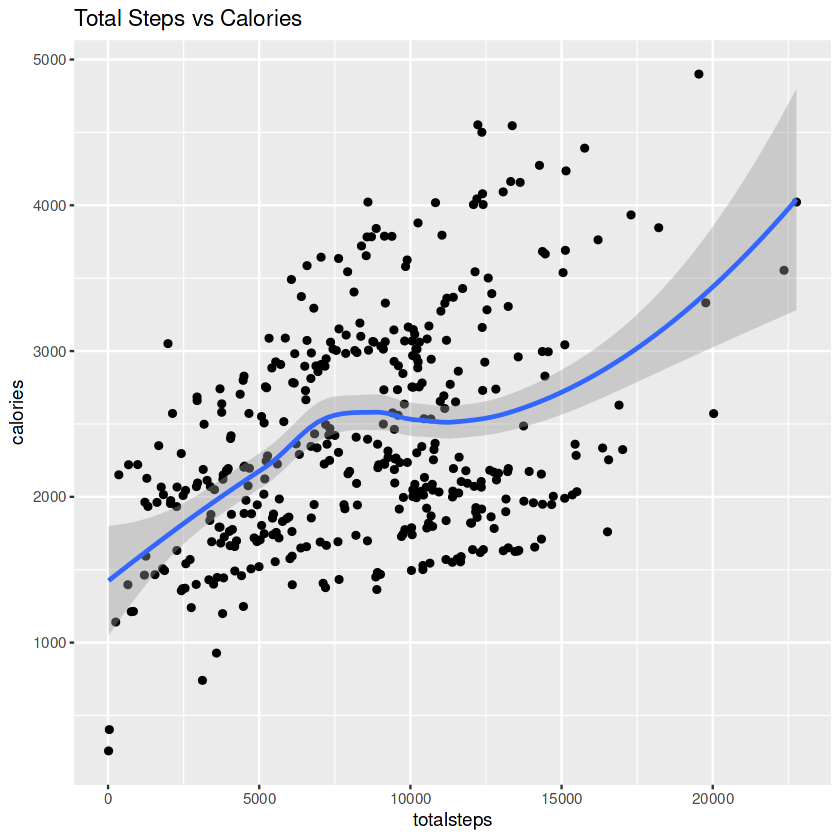

In [16]:
ggplot(data=Daily.Activity_Sleep, aes(x=totalsteps, y=calories)) +
    geom_point() +
    geom_smooth() +
    labs(title="Total Steps vs Calories")

As expected, there is a positive correlation between increased steps and calories burned.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


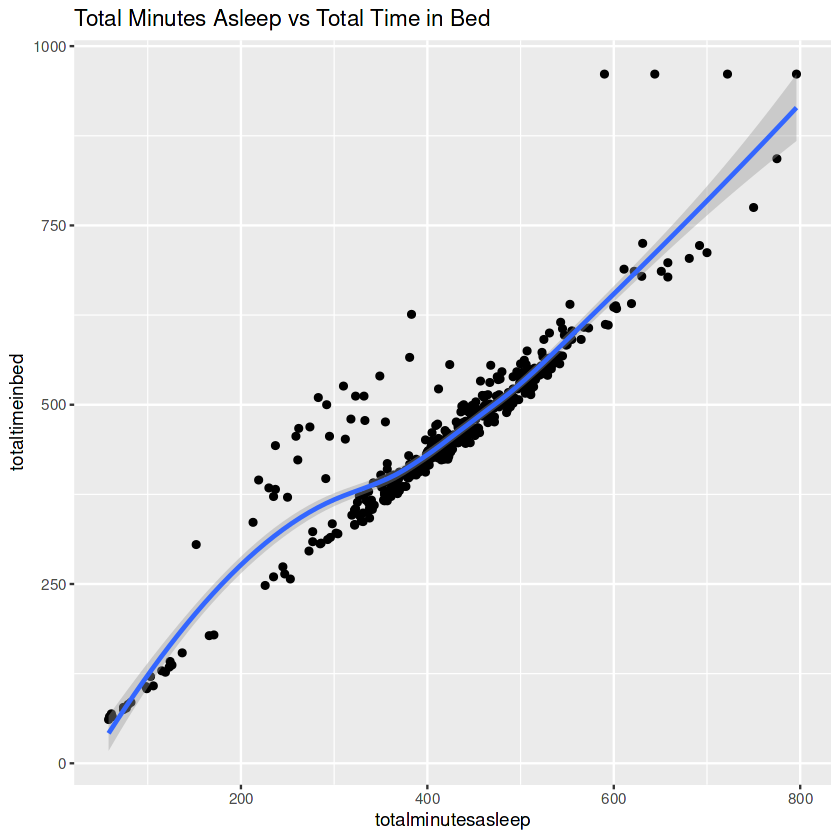

In [17]:
ggplot(data=Daily.Activity_Sleep, aes(x=totalminutesasleep, y=totaltimeinbed)) +
    geom_point() +
    geom_smooth() +
    labs(title="Total Minutes Asleep vs Total Time in Bed")

**6. Act**

**Summary**

Bellabeat is a company that is dedicated to empowering women to make informed decisions to improve their overall health. Analyzing this outside data set has given us some insight on a small sample group. We aren’t sure that it’s representative of the entire population since there’s a lack of demographic information (i.e age, gender, etc), and encourage Bellabeat to continue gathering its own data for stronger insight. With that being said, we do think that the findings are worth mentioning.

We can assume that the women who use Bellabeat are busy balancing their work/home lives. Recommendations on mindfulness and meditative practices could prove to be useful at times that they are sedentary. Our data analysis showed that people spent more time in bed than more time asleep. There’s a lack of data to draw any conclusions as to why that is, but assuming that it’s a potential corrective action, we can recommend that app notifications could be used to encourage users to spend the time that they would’ve spent laying in bed, to be more proactive in how they rest and reset. 

On average, the people represented in this data set did not complete the CDC’s recommended average of 60 min of moderate to intense activity each day. They also did not get the recommended 8 hours of sleep each day. Taking advantage of app notifications to recommend and remind people to get active and get the sleep they need would be helpful. Potential workout regimes and improved sleeping techniques is something that the Bellabeat app could provide.

The more steps that were taken, the more calories that were burned. A reward system for increased activity (increase in steps or calories burned due to more intense physical activity) could be beneficial in motivating Bellabeat users to enrich their overall health. 
